# Diabetic Prediction
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

All patients here are females at least 21 years old of Pima Indian heritage.
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In Outcome variable =>  
1 for Diabetic, 0 for Non Diabetic

Business Goal - To build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes?

### The solution is divided into the following sections:
- Data understanding and exploration
- Data cleaning
- Data Analysis
- Data preparation
- Model building
- Prediction and Model evaluation
- Inference

### Data understanding and exploration

In [55]:
# Importing the required libraries

import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,classification_report,roc_auc_score,roc_curve,auc

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score

from scipy.stats import boxcox

# pip install pandas-profiling 
from pandas_profiling import ProfileReport

from joblib import dump, load


import warnings
warnings.filterwarnings('ignore')

In [56]:
# Setting Display Max columns and display max rows to None so that it displays all the rows and columns which will 
# help us in initial analysis
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [57]:
# Importing the dataset
data = pd.read_csv("../data/diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# Using ProfileReport function from pandas_profiling library
# This gives a concise report of the entire dataset
ProfileReport(data)

In [58]:
# Checking the dataframe size to understand what amount of data we are dealing with
data.shape

(768, 9)

In [59]:
# Checking the dataframe for the datatypes for all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Describe method -
It describes the spread of values across all numerical fields. 
It gives descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. 
It shows information only about numeric features unless parameter include="all" is passed.
It gives below information -
- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- max tells us the maximum value of that feature.

In [60]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

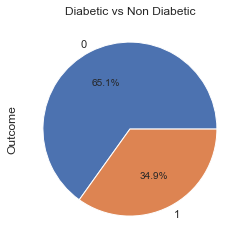

In [61]:
# Plot the percentage of Diabetic vs Non Diabetic Cases
# 1 for Diabetic, 0 for Non Diabetic
plt.title('Diabetic vs Non Diabetic')
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Data Cleaning and Imputation

In [62]:
# Finding out all the column names having 0 in any one of their rows
data.loc[:, (data == 0).any(axis=0)].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')

#### Zero value analysis across the columns
- Pregnancy can be 0
- Outcome is the target variable with value 0 or 1 hence ignoring the same
- columns or variables have an invalid zero value - Glucose, BloodPressure, SkinThickness, Insulin,BMI
 For these columns value with 0 means data not available, hence replacing with NaN

In [63]:
# Replacing value 0 with NaN
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols] = data[cols].replace(0,np.NaN)

In [64]:
# Checking the percentage of missing values across all the columns
#round(100*(data[data.columns].isnull().sum()/len(data.index)),2) # result in %age
data[data.columns].isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [65]:
columns=data.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

Column names except for the target column are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [66]:
#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)


Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


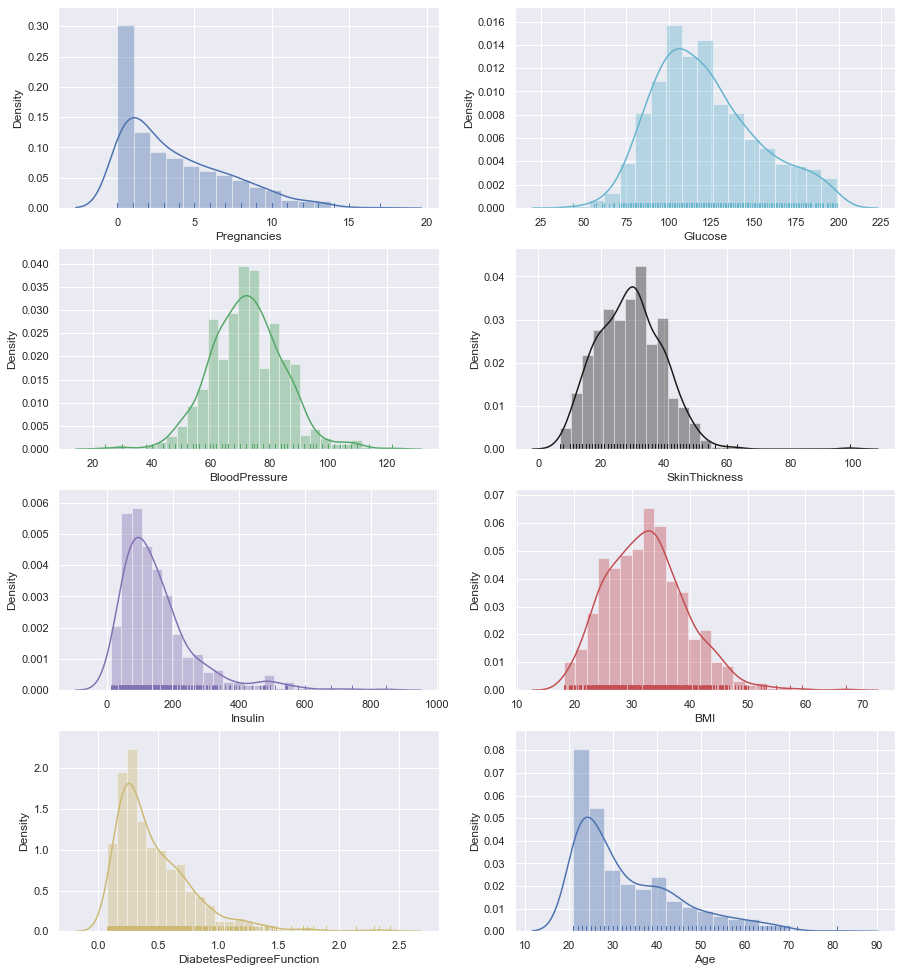

In [67]:
sns.set(rc={'figure.figsize':(15,17)})
#sns.set_style(style='white')
for i in range(len(columns)):
    plt.subplot(4,2,i+1)
    sns.distplot(data[columns[i]], hist=True, rug=True, color=colours[i])

You can use mean value to replace the missing values in case the data distribution is symmetric.
Consider using median or mode with skewed data distribution.
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [68]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [69]:
# Checking the percentage of missing values across all the columns
round(100*(data[data.columns].isnull().sum()/len(data.index)),2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

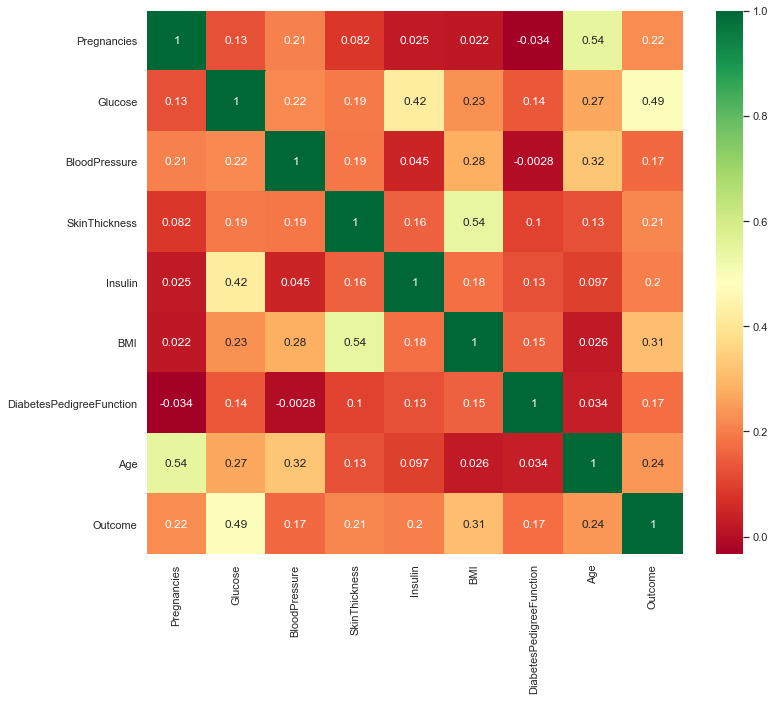

In [70]:
plt.figure(figsize=(12,10))  # set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

## Data preparation

<AxesSubplot:xlabel='Outcome', ylabel='count'>

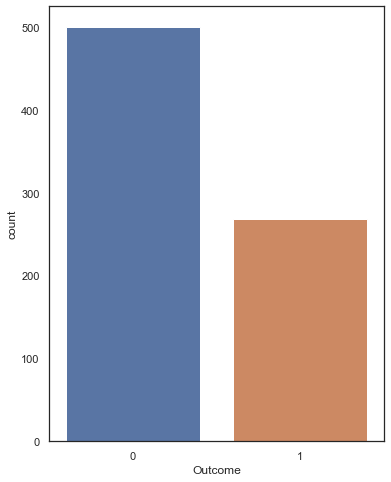

In [71]:
plt.figure(figsize=(6,8))
sns.set_style(style='white')
sns.countplot(data['Outcome'])

In [72]:
# Dividing the entire data into X and y that is all independent feature into X and dependent feature to y
X=data
y=data.pop('Outcome')

In [73]:
# splitting into train and test set
# stratify will make sure that the distribution of outcome classes remain same in test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y)

In [74]:
# Fitting the standard scaler on train set and then transforming across all the sets of X
scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
#Dumping/Storing the scaler object into a file for later use
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

## Model building

In [76]:
models = {
          "Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()        
          }


In [77]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores  

In [78]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.7445887445887446,
 'KNN': 0.7445887445887446,
 'Decision Tree': 0.696969696969697,
 'Random Forest': 0.7359307359307359}

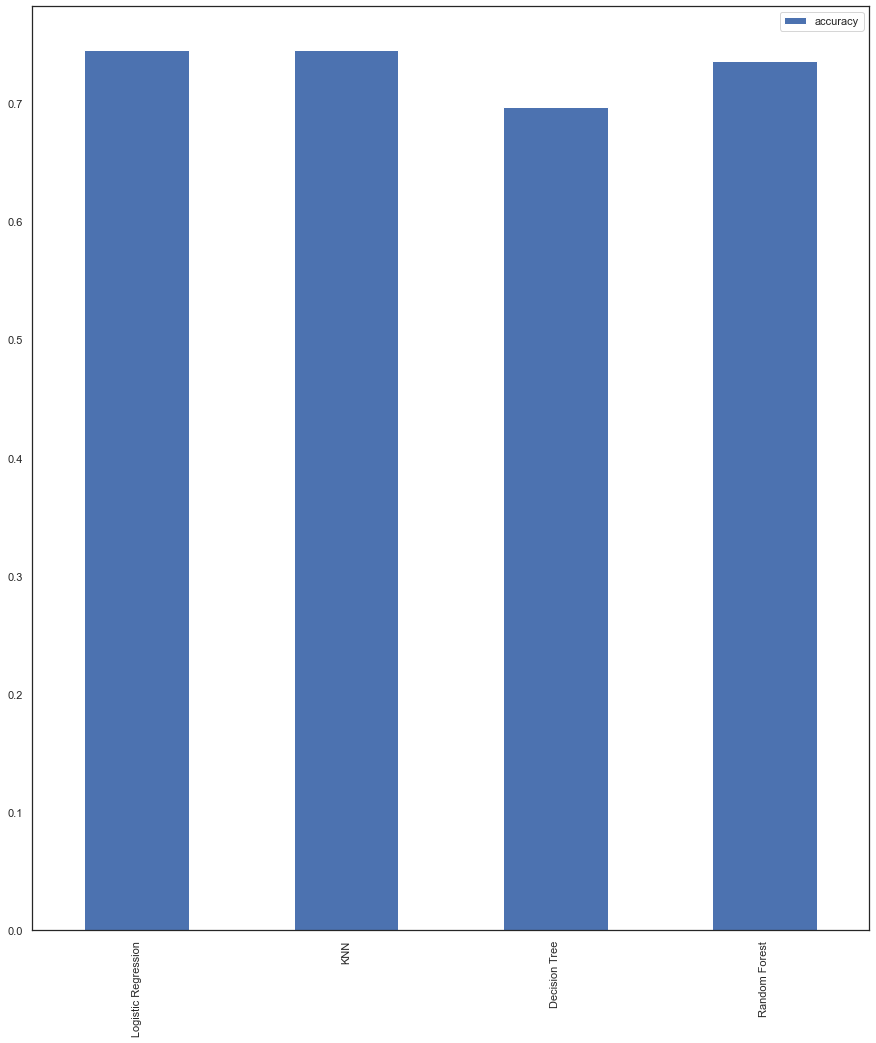

In [79]:
# comparing the model
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
    

KNeighborsClassifier()

In [81]:
# train accuracy
y_train_pred = knn.predict(X_train)

In [83]:
# classification report on train DS
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       350
           1       0.78      0.74      0.76       187

    accuracy                           0.83       537
   macro avg       0.82      0.81      0.82       537
weighted avg       0.83      0.83      0.83       537



In [84]:
# test accuracy
y_test_pred = knn.predict(X_test)

In [85]:
# classification report on test DS
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [86]:
roc_auc_score(y_test,y_test_pred)

0.7067901234567902

# Hyperparameter tuning

In [87]:
np.random.seed(42)

KNN_grid = {'n_neighbors' : [3,5,11,13,19,21,25],
            'weights' : ['uniform','distance'],
            'metric' : ['euclidean','manhattan']}

GS_knn = GridSearchCV(KNeighborsClassifier(),
                           param_grid = KNN_grid,
                           cv = 5,
                           verbose = True)

GS_knn.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 13, 19, 21, 25],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [88]:
GS_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

In [89]:
GS_knn.best_score_

0.7542229145032884

In [90]:
# creating model with best parameters obtainied from Grid search
knn_h = KNeighborsClassifier(metric= 'euclidean', 
                             n_neighbors = 19, 
                             weights = 'uniform')
knn_h.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [91]:
# Making predictions on train set using final KNN
y_train_pred = knn_h.predict(X_train)

In [92]:
# Printing Train Accuracy and confusion matrix
print("Train Accuracy is : ",round(accuracy_score(y_train,y_train_pred),2)*100)
print(confusion_matrix(y_train,y_train_pred))

Train Accuracy is :  80.0
[[313  37]
 [ 68 119]]


In [101]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       350
           1       0.76      0.64      0.69       187

    accuracy                           0.80       537
   macro avg       0.79      0.77      0.78       537
weighted avg       0.80      0.80      0.80       537



In [93]:
# Making predictions on test set using final KNN
y_test_pred = knn_h.predict(X_test)

In [94]:
# Printing Test Accuracy and confusion matrix
print("Test Accuracy is : ",round(accuracy_score(y_test,y_test_pred),2)*100)
print(confusion_matrix(y_test,y_test_pred))

Test Accuracy is :  74.0
[[129  21]
 [ 39  42]]


In [102]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [96]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_test_pred)

0.6892592592592592

In [97]:
### train accuracy is 80% and test accuracy is 74%

In [98]:
# Dumping/Storing the model into a file for later use
dump(knn_h, '../models/model.joblib')

['../models/model.joblib']

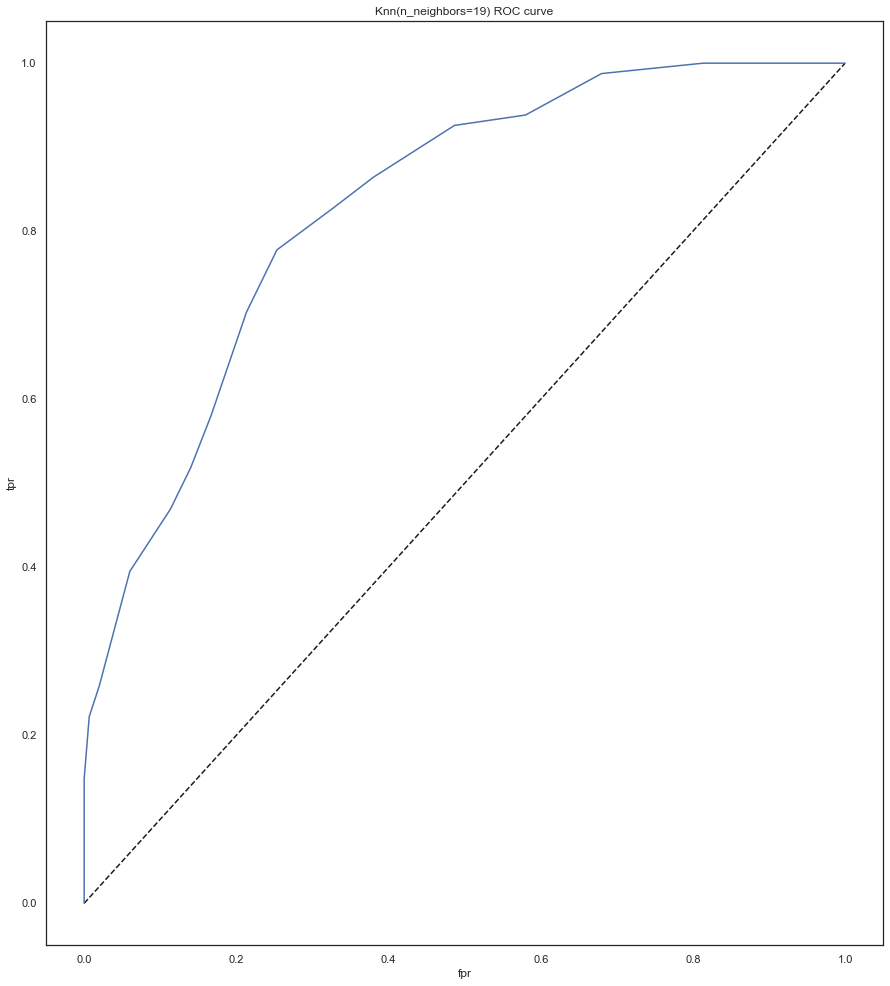

In [99]:
from sklearn.metrics import roc_curve
y_pred_proba = knn_h.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=19) ROC curve')
plt.show()

In [100]:
y_pred_proba = knn_h.predict_proba(X_test)[:,1]
y_pred_proba

array([0.21052632, 0.42105263, 0.78947368, 0.42105263, 0.42105263,
       0.05263158, 0.57894737, 0.05263158, 0.        , 0.36842105,
       0.        , 0.10526316, 0.05263158, 0.57894737, 0.84210526,
       0.78947368, 0.31578947, 0.31578947, 0.63157895, 0.42105263,
       0.31578947, 0.31578947, 0.        , 0.        , 0.57894737,
       0.31578947, 0.36842105, 0.31578947, 0.15789474, 0.15789474,
       0.57894737, 0.68421053, 0.21052632, 0.21052632, 0.15789474,
       0.63157895, 0.10526316, 0.63157895, 0.15789474, 0.42105263,
       0.05263158, 0.73684211, 0.10526316, 0.        , 0.05263158,
       0.57894737, 0.36842105, 0.68421053, 0.26315789, 0.10526316,
       0.15789474, 0.21052632, 0.73684211, 0.05263158, 0.57894737,
       0.10526316, 0.26315789, 0.47368421, 0.42105263, 0.10526316,
       0.        , 0.10526316, 0.47368421, 0.47368421, 0.        ,
       0.15789474, 0.26315789, 0.15789474, 0.10526316, 0.26315789,
       0.78947368, 0.42105263, 0.        , 0.10526316, 0.05263

## Inference

We see that the default KNN model is having ROC-AUC value of 0.70 and it is overfitting on the training data however the model created post hyperparameter tuning is slightly less on overfitting and is having ROC AUC value of 0.68
Hence we will proceed with the model created post hyperparameter tuning.

### Model in Action

In [103]:
# Loading the scaler object from the scaler dump/file
scaler = load('../models/scaler.joblib')

In [104]:
# Loading the model object from the model dump/file
model = load('../models/model.joblib')

In [105]:
# Testing the model on random data
pregnancies = 2
glucose = 180
bloodpressure = 72
skinthickness = 35
insulin = 560
bmi = 33.6
dpf = 0.627
age = 54

row = [pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, dpf, age]
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [106]:
# Transform the inference data same as training data
df = pd.DataFrame([row], columns = cols)
X = scaler.transform(df)
features = pd.DataFrame(X, columns = cols)

In [107]:
# Make predictions using the already built model [0: healthy, 1:diabetes]
if (model.predict(features)==0):
    print("This is a healthy person!")
else: 
    print("This person has high chances of having diabetes!")

This person has high chances of having diabetes!
